In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import os

%matplotlib inline

In [16]:
data1=pd.read_csv('ads_dataset_cut.csv',header=0, sep=',')
data1

,isbuyer\tbuy_freq\tvisit_freq\tbuy_interval\tsv_interval\texpected_time_buy\texpected_time_visit\tlast_buy\tlast_visit\tmultiple_buy\tmultiple_visit\tuniq_urls\tnum_checkins\ty_buy
0,0\t0\t1\t0\t0\t0\t0\t0\t106\t0\t0\t169\t2130\t0
1,0\t0\t1\t0\t0\t0\t0\t0\t72\t0\t0\t154\t1100\t0
2,0\t0\t1\t0\t0\t0\t0\t0\t5\t0\t0\t4\t12\t0
3,0\t0\t1\t0\t0\t0\t0\t0\t6\t0\t0\t150\t539\t0
4,0\t0\t2\t0\t.5\t0\t-101.1493\t0\t101\t0\t1\t10...
...,...
54579,0\t0\t3\t0\t30.97917\t0\t12.62124\t0\t8\t0\t1\...
54580,0\t0\t2\t0\t1.041667\t0\t-.9167125\t0\t1\t0\t1...
54581,0\t0\t1\t0\t0\t0\t0\t0\t20\t0\t0\t132\t556\t0
54582,0\t0\t1\t0\t0\t0\t0\t0\t180\t0\t0\t71\t400\t0


In [17]:
cwd=os.getcwd()
datadir='/'.join(cwd.split('/')[0:-1])+'/desktop/'+'/ds1001/'
f=datadir+'ads_dataset_cut.csv'
data=pd.read_csv(f,sep='\t')
data.columns, data.shape

(Index(['isbuyer', 'buy_freq', 'visit_freq', 'buy_interval', 'sv_interval',
        'expected_time_buy', 'expected_time_visit', 'last_buy', 'last_visit',
        'multiple_buy', 'multiple_visit', 'uniq_urls', 'num_checkins', 'y_buy'],
       dtype='object'),
 (54584, 14))

In [18]:
from sklearn.tree import DecisionTreeClassifier

Y = data['y_buy']
X = data.drop('y_buy',1)
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth= 5)
dt.fit(X,Y)

feature_mi = dt.feature_importances_

In [19]:
feature_mi 

array([0.        , 0.        , 0.16771342, 0.        , 0.06348216,
       0.03180879, 0.0160679 , 0.19175176, 0.46628802, 0.        ,
       0.        , 0.02583561, 0.03705234])

In [20]:
feature_mi_dict=dict(zip(X.columns.values, feature_mi ))
feature_mi_dict

{'isbuyer': 0.0,
 'buy_freq': 0.0,
 'visit_freq': 0.16771342041595774,
 'buy_interval': 0.0,
 'sv_interval': 0.06348216373219415,
 'expected_time_buy': 0.031808786132943516,
 'expected_time_visit': 0.016067903752544764,
 'last_buy': 0.19175175638322217,
 'last_visit': 0.46628801695031524,
 'multiple_buy': 0.0,
 'multiple_visit': 0.0,
 'uniq_urls': 0.025835609522850272,
 'num_checkins': 0.03705234310997212}

In [21]:
from sklearn.metrics import roc_curve,auc

def plotUnivariateROC(preds, truth,label_string):
    
    fpr, tpr, thresholds = roc_curve(truth, preds)
    roc_auc = auc(fpr,tpr)
    
    if roc_auc < 0.5:
        fpr, tpr,thresholds = roc_curve(truth,-1* preds)
        roc_auc = auc(fpr,tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    
    plt.plot( fpr, tpr ,color =c,label = label_string +'(AUC =%0.3f)'%roc_auc)
    
    
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('FPR')
    plt.xlabel('TPR')
    plt.title('ROC')
    plt.legend(loc='lower right')
             
    return roc_auc
    
    
    
    
    

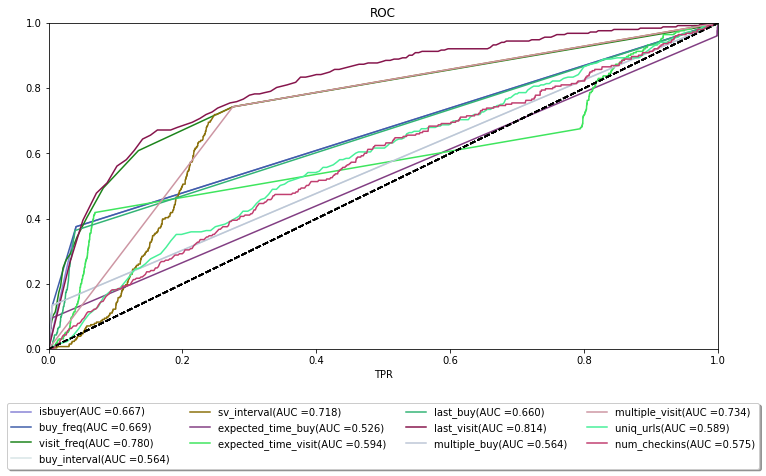

In [24]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)

feature_auc_dict = {}
for col in data.drop('y_buy',1).columns:
    feature_auc_dict[col] = plotUnivariateROC(data[col],Y,col)
    
    
box = ax.get_position()    
ax.set_position([box.x0, box.y0 + box.height*0.0, box.width, box.height*1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15),fancybox=True, shadow = True,
          ncol=4, prop = {'size':10})

In [25]:
data1_auc = pd.DataFrame(pd.Series(feature_auc_dict),columns =['auc'])
data1_mi = pd.DataFrame(pd.Series(feature_mi_dict),columns =['mi'])

feat_imp_data1=data1_auc.merge(data1_mi, left_index =True, right_index =True)
feat_imp_data1

,auc,mi
isbuyer,0.667206,0.000000
buy_freq,0.668931,0.000000
visit_freq,0.780138,0.167713
buy_interval,0.564296,0.000000
sv_interval,0.717967,0.063482
expected_time_buy,0.526401,0.031809
expected_time_visit,0.594029,0.016068
last_buy,0.660148,0.191752
last_visit,0.814216,0.466288
multiple_buy,0.564313,0.000000


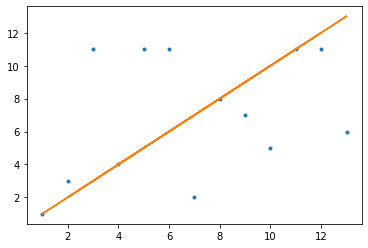

In [26]:
feat_ranks =feat_imp_data1.rank(axis =0, ascending =False)

plt.plot(feat_ranks.auc ,feat_ranks.mi, '.')
plt.plot(feat_ranks.auc ,feat_ranks.auc,)


In [27]:
feat_ranks

,auc,mi
isbuyer,6.0,11.0
buy_freq,5.0,11.0
visit_freq,2.0,3.0
buy_interval,12.0,11.0
sv_interval,4.0,4.0
expected_time_buy,13.0,6.0
expected_time_visit,8.0,8.0
last_buy,7.0,2.0
last_visit,1.0,1.0
multiple_buy,11.0,11.0


In [43]:
top5_auc = list(feat_ranks[(feat_ranks.auc <=5)].index.values)
top5_mi = list(feat_ranks[(feat_ranks.mi <=5)].index.values)
top5_auc,top5_mi


(['buy_freq', 'visit_freq', 'sv_interval', 'last_visit', 'multiple_visit'],
 ['visit_freq', 'sv_interval', 'last_buy', 'last_visit', 'num_checkins'])

In [1]:
from sklearn.linear_model import LogisticRegression

def getLogLoss(Ps, Ys, eps =10**-6):
    return((Ys == 1) * np.log(Ps+eps) + (Ys ==0)*np.log(1-Ps + eps)).mean()

train_pct = 0.8

rand = np.random.rand(data.shape[0])
rand_filt = (rand < train_pct)

train = data[rand_filt]
test = data[(rand_filt ==False)]

fsets = [top5_auc, top5_mi]
fset_descr = ['auc','mi']
mxdepths = [5,10]
Cs = [10**-2, 10**2]

fig = plt.figure(figsize = (15,8))
ax = plt.subplot(111)

for i, fset in enumerate(fsets):
    descr =fset_descr[i]
    Y_train = train['y_buy']
    X_train = train[fset]
    Y_test = test['y_buy']
    X_test = test[fset]
    
    for d in mxdepths:
        dt = DescisionTreeClassifier(criterion = 'entropy', max_depth = d)
        dt.fit(X_train, Y_train)
        preds_dt = dt.predict_proba(X_test)[:,1]
        ll_dt = getLogLoss(preds_dt, Y_test)
        
        plotUnivariateROC(preds_dt, Y_test , '{}:DT:md={}:(LL={})'.format(de
scr ,d ,round(ll_dt,3)))
    
    for C in Cs:
        lr = LogisticRegression(C=C)
        lr.fit(X_train, Y_train)
        preds_lr = lr.predict_proba(X_test)[:1]
        ll_lr = getLogLoss(preds_lr,Y_test)
        
        plotUnivariateROC( preds_lr,Y_test,'{}:LR:C={}:(LL={})'.format(de
scr ,C ,round(ll_lr,3)))
        
        
        
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height *0.0, box.width, box.height*1])
ax.legend(loc = 'upper center ', bbox_to_anchor = (0.5, -0.15), fancybox= True, shadow =True
,ncol = 2, prop ={'size' : 10})
        
        
        
        
        
        
        











SyntaxError: invalid syntax (<ipython-input-1-1b8abced55c6>, line 36)

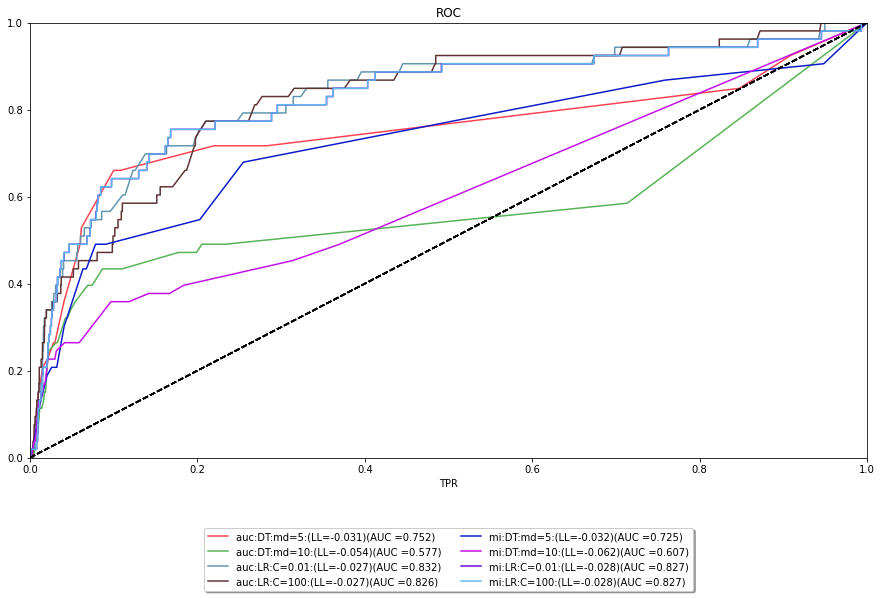

In [45]:
'''
Now do the following
1. Split the data into 80/20 train/test
2. For each set of features:
- build two decision trees (max_depth in {10, 20}) 
- build two logistic regression (C in {10**-2, 10**2})
- get the auc and log-loss on the test set
'''
from sklearn.linear_model import LogisticRegression


def getLogLoss(Ps, Ys, eps = 10**-6):
    return ((Ys == 1) * np.log(Ps + eps) + (Ys == 0) * np.log(1 - Ps + eps)).mean()

#Split into train and test randomly without using sklearn package
#Note, there are many ways to do this:

train_pct = 0.8
#1. create an array of n random uniform variables drawn on [0,1] range
rand = np.random.rand(data.shape[0])
#2. Convert to boolean where True = random number < train_pct
rand_filt = (rand < train_pct)

#Use the filter to index data

train = data[rand_filt]
test = data[(rand_filt == False)]


fsets = [top5_auc, top5_mi]
fset_descr = ['auc', 'mi']
mxdepths = [5, 10]
Cs = [10**-2, 10**2]


#Set up plotting box
fig = plt.figure(figsize = (15, 8))
ax = plt.subplot(111)


for i, fset in enumerate(fsets):
    descr = fset_descr[i]
    #set training and testing data
    Y_train = train['y_buy']
    X_train = train[fset]
    Y_test = test['y_buy']
    X_test = test[fset]
    
    for d in mxdepths:
        dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
        dt.fit(X_train, Y_train)
        preds_dt = dt.predict_proba(X_test)[:, 1]
        ll_dt = getLogLoss(preds_dt, Y_test)
        
        plotUnivariateROC(preds_dt, Y_test, '{}:DT:md={}:(LL={})'.format(descr, d, round(ll_dt, 3)))

        
    for C in Cs:
        lr = LogisticRegression(C = C)
        lr.fit(X_train, Y_train)
        preds_lr = lr.predict_proba(X_test)[:, 1]
        ll_lr = getLogLoss(preds_lr, Y_test)

        plotUnivariateROC(preds_lr, Y_test, '{}:LR:C={}:(LL={})'.format(descr, C, round(ll_lr, 3)))

    
# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 2, prop = {'size':10})